## Observations and Insights 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results, on='Mouse ID',how='left')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice.
mice_id = mouse_df['Mouse ID'].unique()
mice_count = len(mice_id)
merged_data = len(mouse_df)
mice_count

249

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouse_df= mouse_df[mouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicated_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df=mouse_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_mouse_df['Mouse ID']))

249

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_stats_df = clean_mouse_df.groupby(['Drug Regimen'])
means = drug_stats_df['Tumor Volume (mm3)'].mean()
medians = drug_stats_df['Tumor Volume (mm3)'].median()
var = drug_stats_df['Tumor Volume (mm3)'].var()
stds = drug_stats_df['Tumor Volume (mm3)'].std()
sems = drug_stats_df['Tumor Volume (mm3)'].sem()

sum_stats = pd.DataFrame({"Mean Tumor Volume": means,
                          "Media Tumor Volume": medians,
                          "Variance in Tumor Volume": var,
                          "Standard Deviation in Tumor Volume": stds,
                          "SEM Tumor Volume": sems,})
sum_stats.head()

,Mean Tumor Volume,Media Tumor Volume,Variance in Tumor Volume,Standard Deviation in Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = clean_mouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

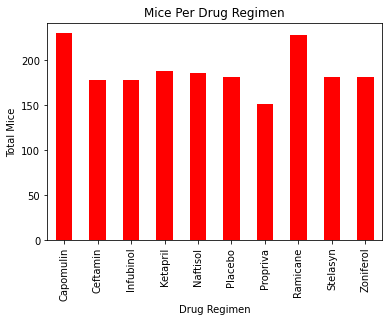

In [39]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_stats_df = drug_stats_df.count()
drug_reg = clean_mouse_df["Drug Regimen"].unique()
mouseids = drug_stats_df["Mouse ID"]
mouseids.plot(kind="bar",title="Mice Per Drug Regimen", ylabel="Total Mice", color="red",width=0.5)

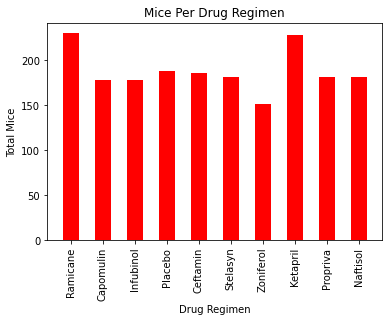

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drug_reg, mouseids, color="red", alpha=1, align="center", width=0.5)
plt.xticks(rotation="vertical")

plt.title('Mice Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice')
plt.show()

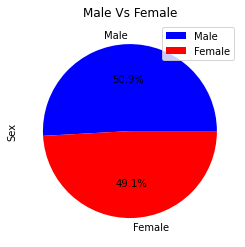

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender= clean_mouse_df["Sex"].value_counts()
colors = ["blue", "red"]
gender.plot(kind="pie", title="Male Vs Female", legend=True, autopct='%1.1f%%', colors=colors)
plt.show()


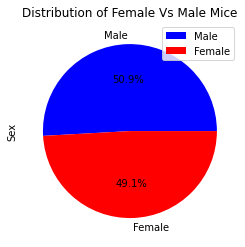

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
plt.pie(gender, labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("Distribution of Female Vs Male Mice")
plt.ylabel("Sex")
plt.legend(labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice = clean_mouse_df.groupby(['Mouse ID'])["Timepoint"]
tp_df = mice.max()
tp_df = tp_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(tp_df, clean_mouse_df, on=["Mouse ID","Timepoint"])
regimen_df =merged_df.drop(columns=['Mouse ID', 'Timepoint', 'Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
regimen_df

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Placebo,70.717621
3,Ceftamin,62.999356
4,Stelasyn,63.440686
...,...,...
244,Propriva,48.710661
245,Ramicane,30.638696
246,Infubinol,62.754451
247,Naftisol,65.741070


In [66]:

# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_df = []

print("Potential Outlier for Each Drug Regimen")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_regimen = final_vol_df.loc[final_vol_df["Drug Regimen"] == treatment, :]


    # add subset 
    tumor_df.append(drug_regimen["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    tumor = drug_regimen["Tumor Volume (mm3)"]
    quartiles = tumor.quantile([0.25, 0.5, 0.75]).round(2)
   
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = upperq-lowerq
    iqr_r = iqr.round(2)
    print(f"-----------------------------------------------------")
    print(f"                   {treatment}")
    print(f"-----------------------------------------------------")
    print(f"Q1: {lowerq}")
    print(f"Q2: {quartiles[0.5]} ")
    print(f"Q3: {upperq}")
    print(f"Interquartile Range: {iqr_r}")
    lower_bound = lowerq - (1.5*iqr_r)
    upper_bound = upperq + (1.5*iqr_r)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

Potential Outlier for Each Drug Regimen
-----------------------------------------------------
                   Capomulin
-----------------------------------------------------
Q1: 32.38
Q2: 38.13 
Q3: 40.16
Interquartile Range: 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
-----------------------------------------------------
                   Ramicane
-----------------------------------------------------
Q1: 31.56
Q2: 36.56 
Q3: 40.66
Interquartile Range: 9.1
Values below 17.91 could be outliers.
Values above 54.309999999999995 could be outliers.
-----------------------------------------------------
                   Infubinol
-----------------------------------------------------
Q1: 54.05
Q2: 60.17 
Q3: 65.53
Interquartile Range: 11.48
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
-----------------------------------------------------
                   Ceftamin
-----------------------------------------------------
Q1

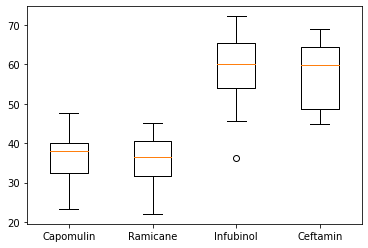

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_df, labels=treatments)

plt.show()

## Line and Scatter Plots

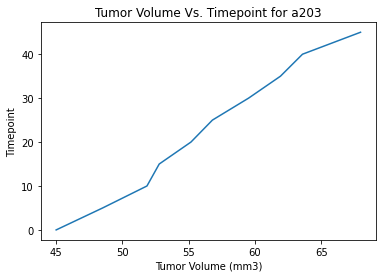

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

a203 = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "a203", :]
plt.plot(a203["Tumor Volume (mm3)"],a203["Timepoint"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title('Tumor Volume Vs. Timepoint for a203')
plt.show()

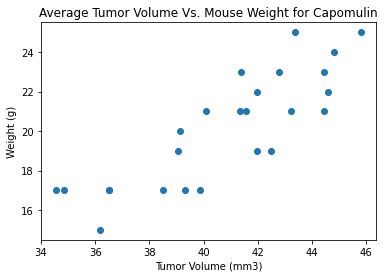

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin", :]
cap_scat = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(cap_scat["Tumor Volume (mm3)"],cap_scat["Weight (g)"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title('Average Tumor Volume Vs. Mouse Weight for Capomulin')
plt.show()

## Correlation and Regression

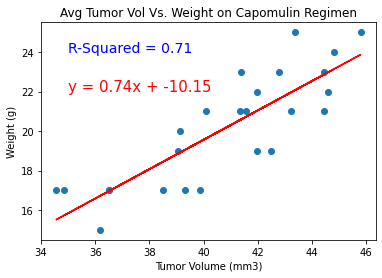

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_scat["Tumor Volume (mm3)"]
y_values = cap_scat["Weight (g)"]

(slope, intercept, r_value, p_value, std_err) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = r_value**2
r_valuer = r_value.round(2)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,22),fontsize=15,color="red")
plt.annotate((f'R-Squared = {r_valuer}'),(35,24),fontsize=14,color="blue")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Avg Tumor Vol Vs. Weight on Capomulin Regimen")
plt.show()